<a href="https://colab.research.google.com/github/mariap13/CMSC320-FinalProject/blob/main/CMSC320_Final_Project_MP_KRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Baltimore City Crime Data
Fall 2024 Data Science Project
Maria Pacheco, Kelly Turner
### Contributions:
* *Project Idea:* Kelly Turner
* *Dataset Curation and Preprocessing:* Kelly Turner, Maria Pacheco
* *Data Exploration and Summary Statistics:* Kelly Turner, Maria Pacheco
* *ML Algorithm Design/Development:* Kelly Turner
* *ML Algorithm Training and Test Data Analysis:*
* *Visualization, Result Analysis, Conclusion:*
* *Final Tutorial Report Creation:*
* *Additional:*

## Introduction
Crime is a big concern for many communities, and understanding where and why it happens can make a huge difference. For our project, we are diving into Baltimore’s crime data to tackle two main questions: (1) Do certain types of crimes happen more often in specific parts of Baltimore? (2) Based on past trends, can we use machine learning to predict if crime rates might go up or down in the future?

Our aim with this project is to reveal trends in major crimes committed in Baltimore City and explore how factors like the type of crime, the location of incidents, and the gender of the perpetrators influence the frequency of crime. These insights can help leaders and law enforcement focus their efforts where they are needed most. If we can predict future trends, we might even be able to help prevent some crimes before they happen. With this analysis, we hope to shine a light on patterns in the data and provide useful insights for making Baltimore a safer place for everyone. <br />

## Questions (brainstorm)
* What are the projected rates of major crime in different districts for Baltimore in the next 5 to 10 years, based on the given data? Model to use: Linear Regression
* Visualize concentrations of crimes for each 5-year(?) span until 2024, then maybe create visualizations of the ML predictions for future years?
https://developers.arcgis.com/python/latest/guide/visualizing-data-with-the-spatially-enabled-dataframe/
* What are the hour breakdowns for the most prevalent crimes (?)




## Data Curation
The data for our project comes from the Baltimore City open data portal API, specifically the Part 1 Crime Data dataset which can be found at the following link: https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/about.<br>This dataset provides detailed information about major crimes (homicide, shootings, robbery, aggravated assault, etc.) committed within the City of Baltimore. It includes details such as the type of crime, location, date, and other characteristics, and is updated weekly to ensure accuracy and relevance.<br><br>Link to data (crime code, inside_outside, location, total_incidents columns not included): https://services1.arcgis.com/UWYHeuuJISiGmgXx/arcgis/rest/services/Part1_Crime_Beta/FeatureServer/0/query?where=1%3D1&outFields=CrimeDateTime,Description,Weapon,Post,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,CCNumber&outSR=4326&f=geojson
<br><strong>Please download the CSV file under download. (file is too large to place in repo)<strong>

## Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# CODE FOR READING DATA INTO CSV FILE
#df = pd.read_csv('/content/Part1_Crime_Beta_5960161298247612570.csv', on_bad_lines='skip')
df = pd.read_csv('/content/Part1_Crime_Beta_5960161298247612570.csv', on_bad_lines='skip')
pd.options.display.max_columns = None
df.info()

<ipython-input-3-0c50f3e4a2fb>:3: DtypeWarning: Columns (5,7,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Part1_Crime_Beta_5960161298247612570.csv', on_bad_lines='skip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641648 entries, 0 to 641647
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            641648 non-null  int64  
 1   CCNumber         641648 non-null  object 
 2   CrimeDateTime    641648 non-null  object 
 3   CrimeCode        641648 non-null  object 
 4   Description      641648 non-null  object 
 5   Inside_Outside   41333 non-null   object 
 6   Weapon           168417 non-null  object 
 7   Post             633512 non-null  object 
 8   Gender           539082 non-null  object 
 9   Age              518262 non-null  float64
 10  Race             609838 non-null  object 
 11  Ethnicity        114385 non-null  object 
 12  Location         637909 non-null  object 
 13  Old_District     566413 non-null  object 
 14  New_District     67182 non-null   object 
 15  Neighborhood     632724 non-null  object 
 16  Latitude         640325 non-null  floa

In [4]:
pd.options.display.max_columns = None
df.head()

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
0,1,14F04840,6/11/2014 12:00:00 AM,3AF,ROBBERY,NaN,FIREARM,425.0,F,18.0,BLACK_OR_AFRICAN_AMERICAN,NaN,3200 EVERGREEN AVE,NORTHEAST,NaN,GLENHAM-BELHAR,39.351694,-76.557490,"(39.351694207058941,-76.557489518131391)",STREET,1,-76.557490,39.351694
1,2,14F05283,6/11/2014 8:15:00 PM,3AF,ROBBERY,NaN,FIREARM,125.0,M,25.0,BLACK_OR_AFRICAN_AMERICAN,NaN,800 PENNSYLVANIA AVE,CENTRAL,NaN,SETON HILL,39.296319,-76.625853,"(39.296319484108885,-76.625852618576189)",PARKING LOT-OUTSIDE,1,-76.625853,39.296319
2,3,14F05597,6/11/2014 7:00:00 AM,5A,BURGLARY,NaN,NaN,425.0,F,28.0,WHITE,NaN,3800 MAYBERRY AVE,NORTHEAST,NaN,ROSEMONT EAST,39.354467,-76.539028,"(39.354466908808519,-76.539028348428062)",YARD,1,-76.539028,39.354467
3,4,14F05409,6/11/2014 8:30:00 PM,6D,LARCENY FROM AUTO,NaN,NaN,413.0,M,39.0,BLACK_OR_AFRICAN_AMERICAN,NaN,1400 KITMORE RD,NORTHEAST,NaN,NEW NORTHWOOD,39.350889,-76.592198,"(39.350888883190123,-76.592198301257767)",STREET,1,-76.592198,39.350889
4,5,14F05185,6/11/2014 6:00:00 PM,3AO,ROBBERY,NaN,OTHER,312.0,M,44.0,WHITE,NaN,1900 N WOLFE ST,EASTERN,NaN,SOUTH CLIFTON PARK,39.312639,-76.591998,"(39.31263916043337,-76.591997914137522)",STADIUM,1,-76.591998,39.312639


### Description of the Crime Data columns:
*   `RowID` - The unique ID for each entry in the dataset
*   `CCNumber` -
*   `CrimeCode` - The police Crime Code assigned to the crime
*   `Description` - The type of crime that was committed
*   `Inside_Outside` - Describes whether the crime occured indoors or outdoors
*   `Weapon` - Described what weapon was used, if any, in the crime
*   `Post` - The police post area the crime occured in
*   `Gender` - The gender ('Female', 'Male', 'Undefined') of the perpetrator
*   `Age` - The age of the perpetrator
*   `Race` - The race of the perpetrator
*   `Ethnicity` - The ethnicity of the perpetrator
*   `Location` - The address of the crime
*   `Old_District` - The district where the crime occured, according to the system used by Baltimore city before July 2023
*   `New_District` - The district where the crime occured, according to the system used by Baltimore city after July 2023
*   `Neighborhood` - The neighborhood where the crime occured
*   `Latitude` - Latitude coordinate of the crime location
*   `Longitude` - Longitude coordinate of the crime location
*   `GeoLocation` - Coordinates of the crime location to be used by ArcGIS
*   `PremiseType` - Brief description of the setting where the crime occured, for example, "Convenience store"
*   `Total_Incidents` - The number of incidents covered by the entry (this is '1' for every entry)




## Data Parsing



The 'Age' column was set to integers from float values, and the frequencies of all unique ages in the column were printed to display the distribution of ages. The null ('None') values in the Age column were set to zero, and going forward we didn't include these zeroes in calculations on age distribution.

In [5]:
# Print number of records with null 'Age' values
print("Null values in the 'Age' column:", df['Age'].isna().sum(), "\tPercentage of records with null age:", df['Age'].isna().sum()/len(df['Age']))

# Create another version of the dataset with null ages replaced with 0
existing_ages = df.copy()
existing_ages['Age'] = existing_ages['Age'].fillna(0)
# Convert all records in Age column to positive integers
existing_ages['Age'] = existing_ages['Age'].astype(int).abs()
# Look at the frequency of each age
print(existing_ages['Age'].value_counts().sort_index())
# Using this information on age outliers, find the mean age for records that fall within a reasonable age range (5 years to 90 years)
existing_ages = existing_ages[existing_ages['Age']<=90]
existing_ages = existing_ages[existing_ages['Age']>=5]
mean_val = existing_ages['Age'].mean().astype(int)
print("Mean for Age:", mean_val)

# Make copy of dataframe for the rest of the cleaning process
crime_data = df.copy()
# Impute missing age values in the dataset with the average age from this range
crime_data['Age'] = crime_data['Age'].fillna(mean_val)
crime_data['Age'] = crime_data['Age'].astype(int).abs()
# ensuring that our age col does not have any more NaN values
print(crime_data['Age'].isna().sum())

Null values in the 'Age' column: 123386 	Percentage of records with null age: 0.19229546417973717
Age
0       123676
1          343
2          274
3          241
4          329
         ...  
7135         3
7147         1
7692         1
7979         1
8251         1
Name: count, Length: 145, dtype: int64
Mean for Age: 38
0


In [6]:
# Replace age outliers with mean age value
crime_data.loc[crime_data['Age'] > 90, 'Age'] = np.nan
crime_data.loc[crime_data['Age'] < 5, 'Age'] = np.nan
crime_data.fillna({'Age': mean_val}, inplace=True)
# Converting back to int because dtypes was float
crime_data['Age'] = crime_data['Age'].astype(int).abs()
print(crime_data.Age.value_counts().sort_index())

Age
5     392
6     473
7     595
8     724
9     854
     ... 
86    355
87    257
88    201
89    189
90    164
Name: count, Length: 86, dtype: int64


In order to avoid errors with future calculations/manipulations, the 'CrimeDateTime' column was converted to datetime, and dates that were set to NaN due to being out of range (ex/a crime that happened in 1557) were removed. The column was then separated into a 'Date' column and a 'Time' column.

In [7]:
# Convert all records in CrimeDateTime column to datetime format
crime_data.CrimeDateTime = pd.to_datetime(crime_data.CrimeDateTime, errors='coerce', format='mixed')
# Drop rows with null values in CrimeDateTime
crime_data.dropna(axis=0, subset=['CrimeDateTime'], inplace=True)
# Check result of the dropna
print("Null 'CrimeDateTime' values:", str(crime_data.CrimeDateTime.isna().sum()))
# Create a 'Date' column with just the date, and a 'Time' column with just the time, from each record in CrimeDateTime
crime_data['Date'] = [d.date() for d in crime_data['CrimeDateTime']]
crime_data['Time'] = [d.time() for d in crime_data['CrimeDateTime']]
# Check these new columns
print("'Date' Column: ", crime_data['Date'].head())
print("'Time' Column: ", crime_data['Time'].head())

Null 'CrimeDateTime' values: 0
'Date' Column:  0    2014-06-11
1    2014-06-11
2    2014-06-11
3    2014-06-11
4    2014-06-11
Name: Date, dtype: object
'Time' Column:  0    00:00:00
1    20:15:00
2    07:00:00
3    20:30:00
4    18:00:00
Name: Time, dtype: object


In [8]:
# Drop the original CrimeDateTime column
crime_data = crime_data.drop('CrimeDateTime', axis=1)
print(crime_data.columns)
# Print min and max dates for the data
print(crime_data.Date.max())
print(crime_data.Date.min())


Index(['RowID', 'CCNumber', 'CrimeCode', 'Description', 'Inside_Outside',
       'Weapon', 'Post', 'Gender', 'Age', 'Race', 'Ethnicity', 'Location',
       'Old_District', 'New_District', 'Neighborhood', 'Latitude', 'Longitude',
       'GeoLocation', 'PremiseType', 'Total_Incidents', 'x', 'y', 'Date',
       'Time'],
      dtype='object')
2024-11-30
1720-08-14


The Baltimore Police Department redrew the police districts and started labeling crimes with the new system on 07/09/2023.  To account for this change, we split the data on this date of the district change.  Crimes committed on and after 07/09/2023 kept the 'New_District' column as their district and crimes committed before then kept the 'Old_District' column as their district.

In [9]:
import datetime
# Define the split date
split_date = datetime.date(2023, 7, 9)
# Create DataFrame for crime records since 07/09/2023
data_new_district = crime_data.loc[crime_data['Date'] >= split_date].copy()
# Create DataFrame for crime records before 07/09/2023
data_old_district = crime_data.loc[crime_data['Date'] < split_date].copy()
# Drop the 'New_District' column from the data before 07/09/2023
data_old_district.drop('New_District', axis=1, inplace=True)
# Drop the 'Old_District' column from the data on and after 07/09/2023
data_new_district.drop('Old_District', axis=1, inplace=True)
# Check that this worked by printing the min and max dates for each dataframe
print("New district data most recent date:",data_new_district.Date.max())
print("Old district data most recent date:",data_old_district.Date.max(), "\n")

print("Total rows in new district dataset:", data_new_district.shape[0])
print("Total rows in old district dataset:", data_old_district.shape[0])

New district data most recent date: 2024-11-30
Old district data most recent date: 2023-07-08 

Total rows in new district dataset: 67324
Total rows in old district dataset: 574320


Now we will be imputing missing values in the Old_District and Neighborhood columns based on the most common pairings between these attributes and removes rows where both are missing.

In [10]:
# Impute the old district half of the dataset
print("Null district values in data_old_district:", data_old_district['Old_District'].isna().sum())
print("Percent of records wiht null district values:", data_old_district['Old_District'].isna().sum()/data_old_district.shape[0])

# Get the subset of old_district_dataset that does NOT have district but DOES have neighborhood
#no_district = data_old_district[data_old_district['Old_District'].isna() & data_old_district['Neighborhood'].notnull()]
#print("Total rows in no_district dataset:", no_district.shape[0])
#print("Null districts in no_district subset before imputation:", no_district['Old_District'].isna().sum())
# Impute null values in Old_District for no_district
#neighborhoods_per_district = data_old_district.groupby('Neighborhood')['Old_District'].agg(lambda x: x.value_counts().idxmax())
#neighborhoods_per_district = neighborhoods_per_district.to_dict()
#no_district['Old_District'] = no_district.apply(lambda row: neighborhoods_per_district[row['Neighborhood']] if pd.isna(row['Old_District']) else row['Old_District'], axis=1)
#print("Null districts in no_district subset after imputation:", no_district['Old_District'].isna().sum())


# Get the subset of old_district_dataset that DOES have district but does NOT have neighborhood
#no_neighborhood = data_old_district[data_old_district['Old_District'].notnull() & data_old_district['Neighborhood'].isna()]
#print("Total rows in no_neighborhood dataset:", no_neighborhood.shape[0])
#print("Null districts in no_neighborhood subset before imputation:", no_neighborhood['Neighborhood'].isna().sum())
# Impute null values in Neighborhood for no_neighborhood
#districts_per_neighborhood = data_old_district.groupby('Old_District')['Neighborhood'].agg(lambda x: x.value_counts().idxmax())
#districts_per_neighborhood = districts_per_neighborhood.to_dict()
#no_neighborhood['Neighborhood'] = no_neighborhood.apply(lambda row: districts_per_neighborhood[row['Old_District']] if pd.isna(row['Neighborhood']) else row['Neighborhood'], axis=1)
#print("Null districts in no_neighborhood subset after imputation:", no_neighborhood['Neighborhood'].isna().sum())


# Replace rows in old_district_dataset with their imputed versions
#data_old_district.update(no_neighborhood)
#data_old_district.update(no_district)
# Remove the records that have both neighborhood and district missing
data_old_district.dropna(subset=['Neighborhood', 'Old_District'], inplace=True)

print("Records with null district field in old district dataset:\n",data_old_district['Old_District'].isna().sum())
print("Records with null neighborhood field in old district dataset:\n",data_old_district['Neighborhood'].isna().sum())

# Rename Old_District as District
data_old_district.rename(columns={'Old_District': 'District'}, inplace=True)

Null district values in data_old_district: 7945
Percent of records wiht null district values: 0.013833751218832707
Records with null district field in old district dataset:
 0
Records with null neighborhood field in old district dataset:
 0


This same imputation process was repeated for the new_district_data section.

In [11]:
# Impute the old district half of the dataset
print("Null district values in data_new_district:", data_new_district['New_District'].isna().sum())
print("Percent of records with null district values:", data_new_district['New_District'].isna().sum()/data_new_district.shape[0])

# Get the subset of old_district_dataset that does NOT have district but DOES have neighborhood
#no_district = data_new_district[data_new_district['New_District'].isna() & data_new_district['Neighborhood'].notnull()]
#print("Total rows in no_district dataset:", no_district.shape[0])
#print("Null districts in no_district subset before imputation:", no_district['New_District'].isna().sum())
# Impute null values in Old_District for no_district
#neighborhoods_per_district = data_new_district.groupby('Neighborhood')['New_District'].agg(lambda x: x.value_counts().idxmax())
#neighborhoods_per_district = neighborhoods_per_district.to_dict()
#no_district['New_District'] = no_district.apply(lambda row: neighborhoods_per_district[row['Neighborhood']] if pd.isna(row['New_District']) else row['New_District'], axis=1)
#print("Null districts in no_district subset after imputation:", no_district['New_District'].isna().sum())


# Get the subset of old_district_dataset that DOES have district but does NOT have neighborhood
#no_neighborhood = data_new_district[data_new_district['New_District'].notnull() & data_new_district['Neighborhood'].isna()]
#print("Total rows in no_neighborhood dataset:", no_neighborhood.shape[0])
#print("Null districts in no_neighborhood subset before imputation:", no_neighborhood['Neighborhood'].isna().sum())
# Impute null values in Neighborhood for no_neighborhood
#districts_per_neighborhood = data_new_district.groupby('New_District')['Neighborhood'].apply(lambda x: x.value_counts().idxmax())
#districts_per_neighborhood = districts_per_neighborhood.to_dict()
#no_neighborhood['Neighborhood'] = no_neighborhood.apply(lambda row: districts_per_neighborhood[row['New_District']] if pd.isna(row['Neighborhood']) else row['Neighborhood'], axis=1)
#print("Null districts in no_neighborhood subset after imputation:", no_neighborhood['Neighborhood'].isna().sum())


# Replace rows in data_new_district with their imputed versions
#data_new_district.update(no_district)
#data_new_district.update(no_neighborhood)
# Remove the records that have both neighborhood and district missing
data_new_district.dropna(subset=['New_District', 'Neighborhood'], inplace=True)
print("Records with null district field in new district dataset:\n",data_new_district['New_District'].isna().sum())
print("Records with null neighborhood field in new district dataset:\n",data_new_district['Neighborhood'].isna().sum())

# Rename New_District as District
data_new_district.rename(columns={'New_District': 'District'}, inplace=True)

Null district values in data_new_district: 142
Percent of records with null district values: 0.002109203255896857
Records with null district field in new district dataset:
 0
Records with null neighborhood field in new district dataset:
 0


The original crime_data DataFrame was updated by combining the imputed halves (data_old_district and data_new_district). The updated crime_data now contains a single column, District, with no missing values, reflecting new districts for records after 07/09/2023 and old districts for records before that date.

In [12]:
crime_data = pd.concat([data_new_district, data_old_district])
crime_data.head()

,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y,Date,Time
113599,113600,23L09396,6F,LARCENY FROM AUTO,NaN,NaN,715.0,M,69,WHITE,NOT_HISPANIC_OR_LATINO,HARLEM AVE,WESTERN,HARLEM PARK,39.296547,-76.644311,"(39.296547,-76.644311)",STREET,1,-76.644311,39.296547,2023-12-30,10:30:00
118487,118488,24C02405,6C,LARCENY,NaN,NaN,511.0,NaN,38,NaN,NaN,FALLS RD,NORTHERN,HAMPDEN,39.332669,-76.635531,"(39.332669,-76.635531)",NaN,1,-76.635531,39.332669,2023-12-30,19:15:00
118872,118873,24A00141,5B,BURGLARY,NaN,NaN,532.0,NaN,38,NaN,NaN,3900 PARK HEIGHTS AVE,NORTHERN,GREENSPRING,39.333717,-76.661856,"(39.333717,-76.661856)",CONVENIENCE STORE,1,-76.661856,39.333717,2023-12-31,20:30:00
124187,124188,23L09308,9S,SHOOTING,NaN,OTHER_FIREAR,311.0,M,24,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,1800 MARYLAND AVE,EASTERN,CHARLES NORTH,39.309797,-76.617908,"(39.309797,-76.617908)",STREET,1,-76.617908,39.309797,2023-12-30,00:00:00
127586,127587,23L01699,7A,AUTO THEFT,NaN,NaN,615.0,M,67,UNKNOWN,HISPANIC_OR_LATINO,3100 PRESBURY ST,NORTHWEST,ROSEMONT,39.307006,-76.669954,"(39.307006,-76.669954)",STREET,1,-76.669954,39.307006,2023-12-05,19:15:00


We removed the Latitude, Longitude, x and y columns, as they are not currently needed for mapping data points <strong>(this may change in the future)</strong>. The Total_Incidents column was also removed because it redundantly recorded a single instance for each crime event in the dataset.

In [13]:
#remove Latitude, Longitude, x, y, total_incidents columns
crime_data.drop(['Latitude', 'Longitude','Total_Incidents', 'x', 'y'], axis=1, inplace=True)
crime_data.head()

,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,GeoLocation,PremiseType,Date,Time
113599,113600,23L09396,6F,LARCENY FROM AUTO,NaN,NaN,715.0,M,69,WHITE,NOT_HISPANIC_OR_LATINO,HARLEM AVE,WESTERN,HARLEM PARK,"(39.296547,-76.644311)",STREET,2023-12-30,10:30:00
118487,118488,24C02405,6C,LARCENY,NaN,NaN,511.0,NaN,38,NaN,NaN,FALLS RD,NORTHERN,HAMPDEN,"(39.332669,-76.635531)",NaN,2023-12-30,19:15:00
118872,118873,24A00141,5B,BURGLARY,NaN,NaN,532.0,NaN,38,NaN,NaN,3900 PARK HEIGHTS AVE,NORTHERN,GREENSPRING,"(39.333717,-76.661856)",CONVENIENCE STORE,2023-12-31,20:30:00
124187,124188,23L09308,9S,SHOOTING,NaN,OTHER_FIREAR,311.0,M,24,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,1800 MARYLAND AVE,EASTERN,CHARLES NORTH,"(39.309797,-76.617908)",STREET,2023-12-30,00:00:00
127586,127587,23L01699,7A,AUTO THEFT,NaN,NaN,615.0,M,67,UNKNOWN,HISPANIC_OR_LATINO,3100 PRESBURY ST,NORTHWEST,ROSEMONT,"(39.307006,-76.669954)",STREET,2023-12-05,19:15:00


While analyzing the Weapon feature, we noticed that some descriptions were incomplete versions of existing ones, such as 'AUTOMATIC_FI' being an incomplete version of 'AUTOMATIC_FIREARM'. To ensure accurate categorization, each incomplete description was replaced with its complete counterpart.
<br><strong>Note:</strong> Where the Weapon column is NaN, it usually indicates that the crime description and code did not involve a weapon, such as in cases of crimes committed by force or without force.  For future analysis these null values in the Weapon column were replaced with 'NONE'.

In [14]:
# Clean Weapon feature
print("Weapons before editing:", crime_data['Weapon'].unique(), '\n')
crime_data.replace("KNIFE_CUTTIN", "KNIFE_CUTTING_INSTRUMENT", inplace=True)
crime_data.replace("AUTOMATIC_FI", "AUTOMATIC_FIREARM", inplace=True)
crime_data.replace("AUTOMATIC_RI", "AUTOMATIC_RIFLE", inplace=True)
crime_data.replace("AUTOMATIC_SH", "AUTOMATIC_SHOTGUN", inplace=True)
crime_data.replace("AUTOMATIC_HA", "AUTOMATIC_HANDGUN", inplace=True)
crime_data.replace('PERSONAL_WEA', 'PERSONAL_WEAPON', inplace=True)
crime_data.replace('OTHER_FIREAR', 'FIREARM', inplace=True)
crime_data.replace('OTHER_FIREARM', 'FIREARM', inplace=True)
crime_data.replace('PERSONAL_WEAPONS', 'PERSONAL_WEAPON', inplace=True)
crime_data.replace('FIRE_INCENDI', 'FIRE_INCENDIARY_DEVICE', inplace=True)
crime_data.replace('MOTOR_VEHICL', 'MOTOR_VEHICLE_VESSEL', inplace=True)
crime_data.replace('DRUGS_NARCOT', 'DRUGS_NARCOTICS_SLEEPING_PILLS', inplace=True)
crime_data.replace('Y', 'OTHER', inplace=True)
crime_data['Weapon'].replace(np.nan, 'NONE', inplace=True)
print("Weapons after editing:", crime_data['Weapon'].unique())

Weapons before editing: [nan 'OTHER_FIREAR' 'PERSONAL_WEAPONS' 'HANDGUN' 'BLUNT_OBJECT' 'OTHER'
 'KNIFE_CUTTING_INSTRUMENT' 'FIREARM' 'UNKNOWN' 'ASPHYXIATION'
 'MOTOR_VEHICLE_VESSEL' 'PERSONAL_WEA' 'AUTOMATIC_FIREARM'
 'FIRE_INCENDIARY_DEVICE' 'EXPLOSIVES' 'POISON' 'SHOTGUN' 'RIFLE'
 'DRUGS_NARCOTICS_SLEEPING_PILLS' 'OTHER_FIREARM' 'KNIFE_CUTTIN'
 'AUTOMATIC_FI' 'Y' 'MOTOR_VEHICL' 'HANDS' 'KNIFE' 'FIRE' 'AUTOMATIC_HA'
 'FIRE_INCENDI' 'AUTOMATIC_RI' 'AUTOMATIC_SH' 'DRUGS_NARCOT'] 

Weapons after editing: ['NONE' 'FIREARM' 'PERSONAL_WEAPON' 'HANDGUN' 'BLUNT_OBJECT' 'OTHER'
 'KNIFE_CUTTING_INSTRUMENT' 'UNKNOWN' 'ASPHYXIATION'
 'MOTOR_VEHICLE_VESSEL' 'AUTOMATIC_FIREARM' 'FIRE_INCENDIARY_DEVICE'
 'EXPLOSIVES' 'POISON' 'SHOTGUN' 'RIFLE' 'DRUGS_NARCOTICS_SLEEPING_PILLS'
 'HANDS' 'KNIFE' 'FIRE' 'AUTOMATIC_HANDGUN' 'AUTOMATIC_RIFLE'
 'AUTOMATIC_SHOTGUN']


<ipython-input-14-a0da00fd5ce3>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_data['Weapon'].replace(np.nan, 'NONE', inplace=True)


We also removed the CrimeCode column. After evaluating the following link from Baltimore City Crime Data Documentation: https://data.baltimorecity.gov/documents/e6ca4eadecdc475a961f68bc314e2a86/about, we found that the CrimeCode corresponds to the type of crime combined with the type of weapon used. For example, 3CF and 3CK both represent Robbery - Commercial crimes, but differ in their CrimeCode due to the weapon used (firearm vs. knife). Since we already had the Description and Weapon columns, we felt we could safely remove the CrimeCode column.

In [15]:
print("Different types of Crime Codes:", crime_data['CrimeCode'].unique(), '\n')
print("Different types of Crime Description:", crime_data['Description'].unique(), '\n')

# Dropping CrimeCodes
crime_data.drop(['CrimeCode'], axis=1, inplace=True)
crime_data.head()

Different types of Crime Codes: ['6F' '6C' '5B' '9S' '7A' '6G' '5A' '6J' '4E' '6D' '3A' '4A' '8A' '2A'
 '3C' '1A' '3BJ' '6A' '6H' '5F' '3CO' '6B' '3' '3AF' '3CF' '6E' '8I' '7C'
 '3P' '3AO' '3NF' '3CK' '7B' '3AK' '8H' '3JF' '3JO' '3NO' '3GO' '3AJF'
 '3AJO' '3LF' '3EO' '3GK' '3GF' '3JK' '3AJK' '3J' '3LO' '3EF' '3G' '3EK'
 '8AO' '3NK' '3L' '3M' '8J' '5D' '4D' '3B' '4C' '4B' '5C' '3K' '6L' '5E'
 '3N' '3D' '8FO' '1K' '1O' '2B' '8AV' '3F' '8BO' '8EO' '3H' '8CO' '8EV'
 '8BV' '8GO' '8FV' '8CV' '8GV' '6K' '3E' '3LK' '1B' '5G' '8DO'] 

Different types of Crime Description: ['LARCENY FROM AUTO' 'LARCENY' 'BURGLARY' 'SHOOTING' 'AUTO THEFT'
 'COMMON ASSAULT' 'ROBBERY' 'AGG. ASSAULT' 'ARSON' 'RAPE'
 'ROBBERY - COMMERCIAL' 'HOMICIDE' 'ROBBERY - CARJACKING'] 



,RowID,CCNumber,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,GeoLocation,PremiseType,Date,Time
113599,113600,23L09396,LARCENY FROM AUTO,NaN,NONE,715.0,M,69,WHITE,NOT_HISPANIC_OR_LATINO,HARLEM AVE,WESTERN,HARLEM PARK,"(39.296547,-76.644311)",STREET,2023-12-30,10:30:00
118487,118488,24C02405,LARCENY,NaN,NONE,511.0,NaN,38,NaN,NaN,FALLS RD,NORTHERN,HAMPDEN,"(39.332669,-76.635531)",NaN,2023-12-30,19:15:00
118872,118873,24A00141,BURGLARY,NaN,NONE,532.0,NaN,38,NaN,NaN,3900 PARK HEIGHTS AVE,NORTHERN,GREENSPRING,"(39.333717,-76.661856)",CONVENIENCE STORE,2023-12-31,20:30:00
124187,124188,23L09308,SHOOTING,NaN,FIREARM,311.0,M,24,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,1800 MARYLAND AVE,EASTERN,CHARLES NORTH,"(39.309797,-76.617908)",STREET,2023-12-30,00:00:00
127586,127587,23L01699,AUTO THEFT,NaN,NONE,615.0,M,67,UNKNOWN,HISPANIC_OR_LATINO,3100 PRESBURY ST,NORTHWEST,ROSEMONT,"(39.307006,-76.669954)",STREET,2023-12-05,19:15:00


Impute missing values in PremiseType with the most common premise type for that value's crime description



In [46]:
print("Null district values in data_new_district:", crime_data['PremiseType'].isna().sum())
print("Percent of records with null district values:", crime_data['PremiseType'].isna().sum()/data_new_district.shape[0])

# Get the subset of dataset that does NOT have premise type but DOES have description
no_premise = crime_data[crime_data['PremiseType'].isna() & crime_data['Description'].notnull()]
print("Total rows in no_premise dataset:", no_premise.shape[0])

# Impute null values using crime_data for no_premise
descrip_per_premise = crime_data.groupby('Description')['PremiseType'].agg(lambda x: x.value_counts().idxmax())
descrip_per_premise = descrip_per_premise.to_dict()
no_premise['PremiseType'] = no_premise.apply(lambda row: descrip_per_premise[row['Description']] if pd.isna(row['PremiseType']) else row['PremiseType'], axis=1)
print("Null districts in no_district subset after imputation:", no_premise['PremiseType'].isna().sum())

# Apply these changes to crime_data
crime_data[crime_data['PremiseType'].isna() & crime_data['Description'].notnull()] = no_premise
print("Null district values in crime_data after imputation:", crime_data['PremiseType'].isna().sum())

Null district values in data_new_district: 50981
Percent of records with null district values: 0.7626862545628628
Total rows in no_premise dataset: 50981


<ipython-input-46-d0c19e4adf25>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_premise['PremiseType'] = no_premise.apply(lambda row: descrip_per_premise[row['Description']] if pd.isna(row['PremiseType']) else row['PremiseType'], axis=1)


Null districts in no_district subset after imputation: 0
Null district values in data_new_district after imputation: 0


We decided to combine the Race and Ethnicity columns into a new Race_Ethnicity column, replacing missing values in both columns with 'UNKNOWN'. This combination allows for a more comprehensive analysis by considering both race and ethnicity together, which can help group or categorize data more effectively, particularly when both attributes are relevant for demographic analysis.

In [17]:
print("Race:", crime_data['Race'].unique(), '\n')
print("Ethnicity:", crime_data['Ethnicity'].unique(), '\n')
# unknown_race_hispanic = crime_data[(crime_data['Race'] == 'UNKNOWN') & (crime_data['Ethnicity'] == 'HISPANIC_OR_LATINO')]
# Replace NaN values with 'UNKNOWN' and assign them back to the dataframe
crime_data['Race'] = crime_data['Race'].fillna('UNKNOWN')
crime_data['Ethnicity'] = crime_data['Ethnicity'].fillna('UNKNOWN')
crime_data['Ethnicity'].replace(' ', 'UNKNOWN', inplace=True)
# Combine Race and Ethnicity into a new column
crime_data['Race_Ethnicity'] = crime_data['Race'] + '_' + crime_data['Ethnicity']
print(crime_data['Race_Ethnicity'].unique())

crime_data.head()

Race: ['WHITE' nan 'BLACK_OR_AFRICAN_AMERICAN' 'UNKNOWN' 'ASIAN'
 'AMERICAN_INDIAN_OR_ALASKA_NATIVE'
 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER'] 

Ethnicity: ['NOT_HISPANIC_OR_LATINO' nan 'UNKNOWN' 'HISPANIC_OR_LATINO' ' '
 'SOUTH_ASIAN' 'MIDDLE_EASTERN' 'EAST_ASIAN'] 

['WHITE_NOT_HISPANIC_OR_LATINO' 'UNKNOWN_UNKNOWN'
 'BLACK_OR_AFRICAN_AMERICAN_UNKNOWN' 'UNKNOWN_HISPANIC_OR_LATINO'
 'BLACK_OR_AFRICAN_AMERICAN_NOT_HISPANIC_OR_LATINO'
 'ASIAN_NOT_HISPANIC_OR_LATINO' 'UNKNOWN_ ' 'WHITE_HISPANIC_OR_LATINO'
 'AMERICAN_INDIAN_OR_ALASKA_NATIVE_HISPANIC_OR_LATINO' 'WHITE_UNKNOWN'
 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_HISPANIC_OR_LATINO'
 'UNKNOWN_SOUTH_ASIAN' 'UNKNOWN_NOT_HISPANIC_OR_LATINO'
 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_UNKNOWN'
 'ASIAN_MIDDLE_EASTERN' 'ASIAN_UNKNOWN'
 'BLACK_OR_AFRICAN_AMERICAN_HISPANIC_OR_LATINO'
 'NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_NOT_HISPANIC_OR_LATINO'
 'AMERICAN_INDIAN_OR_ALASKA_NATIVE_UNKNOWN'
 'AMERICAN_INDIAN_OR_ALASKA_NATIVE_NOT_HISPA

,RowID,CCNumber,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,District,Neighborhood,GeoLocation,PremiseType,Date,Time,Race_Ethnicity
113599,113600,23L09396,LARCENY FROM AUTO,NaN,NONE,715.0,M,69,WHITE,NOT_HISPANIC_OR_LATINO,HARLEM AVE,WESTERN,HARLEM PARK,"(39.296547,-76.644311)",STREET,2023-12-30,10:30:00,WHITE_NOT_HISPANIC_OR_LATINO
118487,118488,24C02405,LARCENY,NaN,NONE,511.0,NaN,38,UNKNOWN,UNKNOWN,FALLS RD,NORTHERN,HAMPDEN,"(39.332669,-76.635531)",NaN,2023-12-30,19:15:00,UNKNOWN_UNKNOWN
118872,118873,24A00141,BURGLARY,NaN,NONE,532.0,NaN,38,UNKNOWN,UNKNOWN,3900 PARK HEIGHTS AVE,NORTHERN,GREENSPRING,"(39.333717,-76.661856)",CONVENIENCE STORE,2023-12-31,20:30:00,UNKNOWN_UNKNOWN
124187,124188,23L09308,SHOOTING,NaN,FIREARM,311.0,M,24,BLACK_OR_AFRICAN_AMERICAN,UNKNOWN,1800 MARYLAND AVE,EASTERN,CHARLES NORTH,"(39.309797,-76.617908)",STREET,2023-12-30,00:00:00,BLACK_OR_AFRICAN_AMERICAN_UNKNOWN
127586,127587,23L01699,AUTO THEFT,NaN,NONE,615.0,M,67,UNKNOWN,HISPANIC_OR_LATINO,3100 PRESBURY ST,NORTHWEST,ROSEMONT,"(39.307006,-76.669954)",STREET,2023-12-05,19:15:00,UNKNOWN_HISPANIC_OR_LATINO


In [18]:
print(crime_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 632334 entries, 113599 to 641647
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   RowID           632334 non-null  int64 
 1   CCNumber        632334 non-null  object
 2   Description     632334 non-null  object
 3   Inside_Outside  40990 non-null   object
 4   Weapon          632334 non-null  object
 5   Post            632270 non-null  object
 6   Gender          530987 non-null  object
 7   Age             632334 non-null  int64 
 8   Race            632334 non-null  object
 9   Ethnicity       632334 non-null  object
 10  Location        630654 non-null  object
 11  District        632334 non-null  object
 12  Neighborhood    632334 non-null  object
 13  GeoLocation     632334 non-null  object
 14  PremiseType     581353 non-null  object
 15  Date            632334 non-null  object
 16  Time            632334 non-null  object
 17  Race_Ethnicity  632334 non-nu

##Data Exploration and Summary Statistics
Next, we analyzed the cleaned crime data by conducting statistical tests to draw meaningful conclusions. First the main characteristics of the dataset, such as the number of features and entries, were identified.  We then explored the distribution of each feature to uncover potential over-representation, correlations or trends. Using hypothesis testing, we investigated whether certain features are significantly associated with others, and identify any outliers in the data. For each analysis, we created visually appealing plots to effectively communicate our findings and guide our choice of primary analysis techniques.


In [19]:
# Set original df to the imputed copy
df = crime_data

In [20]:
col_names = ['Description', 'Inside_Outside', 'Weapon', 'Gender', 'Age', 'Race', 'Ethnicity', 'District', 'Neighborhood', 'PremiseType', 'Race_Ethnicity', 'Date']
for i in col_names:
  print("Unique values in", i, ": \t", df[i].unique())
  print("Frequency of unique values in: ", df[i].value_counts())

Unique values in Description : 	 ['LARCENY FROM AUTO' 'LARCENY' 'BURGLARY' 'SHOOTING' 'AUTO THEFT'
 'COMMON ASSAULT' 'ROBBERY' 'AGG. ASSAULT' 'ARSON' 'RAPE'
 'ROBBERY - COMMERCIAL' 'HOMICIDE' 'ROBBERY - CARJACKING']
Frequency of unique values in:  Description
LARCENY                 141192
COMMON ASSAULT          116669
BURGLARY                 82921
LARCENY FROM AUTO        77129
AGG. ASSAULT             72833
AUTO THEFT               62090
ROBBERY                  48491
ROBBERY - COMMERCIAL      7585
SHOOTING                  7010
ROBBERY - CARJACKING      5701
RAPE                      4303
HOMICIDE                  3754
ARSON                     2656
Name: count, dtype: int64
Unique values in Inside_Outside : 	 [nan 'I' 'O']
Frequency of unique values in:  Inside_Outside
I    23023
O    17967
Name: count, dtype: int64
Unique values in Weapon : 	 ['NONE' 'FIREARM' 'PERSONAL_WEAPON' 'HANDGUN' 'BLUNT_OBJECT' 'OTHER'
 'KNIFE_CUTTING_INSTRUMENT' 'UNKNOWN' 'ASPHYXIATION'
 'MOTOR_VEHICLE_

A boxplot was used to examine the distribution of ages for criminals in the dataset.


90


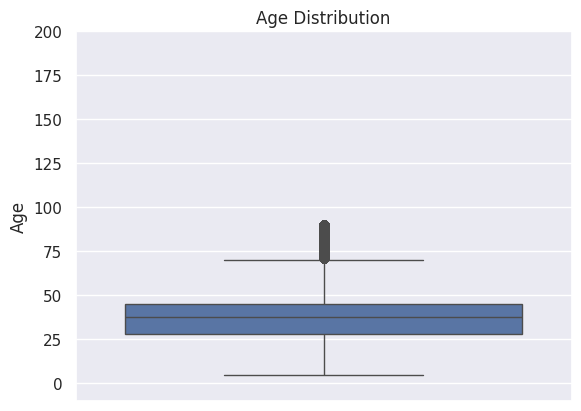

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)
sns.boxplot(df['Age'])
print(str(df['Age'].max()))
plt.ylim(-10, 200)
plt.title(f'Age Distribution')
plt.show()


The frequencies of types of crime were graphed.  It was found that larceny is the most commonly reported crime, with roughly 140,000 records.

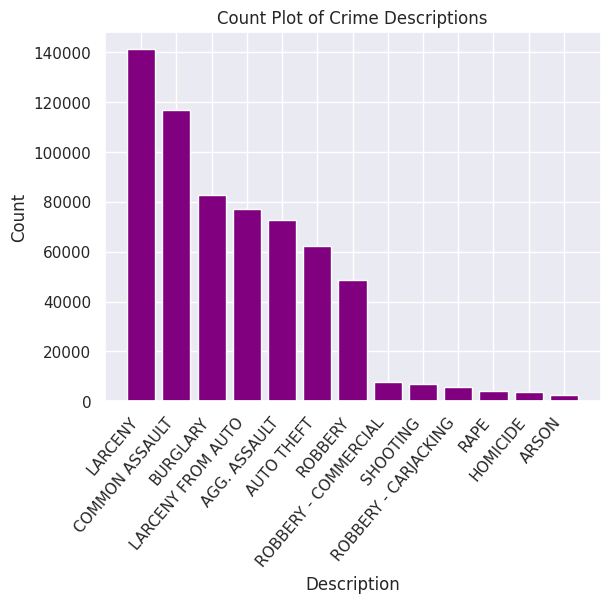

In [22]:
descrip_counts = df['Description'].value_counts()
sns.set(font_scale=1)
plt.bar(descrip_counts.index, descrip_counts, color='purple')
plt.title('Count Plot of Crime Descriptions')
plt.xlabel('Description')
plt.xticks(rotation=50, horizontalalignment='right')
plt.ylabel('Count')
plt.show()

A frequency analysis of the Race_Ethnicity column reflected the overall population of Baltimore; it revealed that Black or African Americans are reported more frequently across various crime categories in the dataset. This trend suggests a potential overrepresentation of this group in relation to the crimes reported.  A significant portion of the data does not have race or ethnicity reported, which makes this result less representative of the actual demographics for perpetrators.

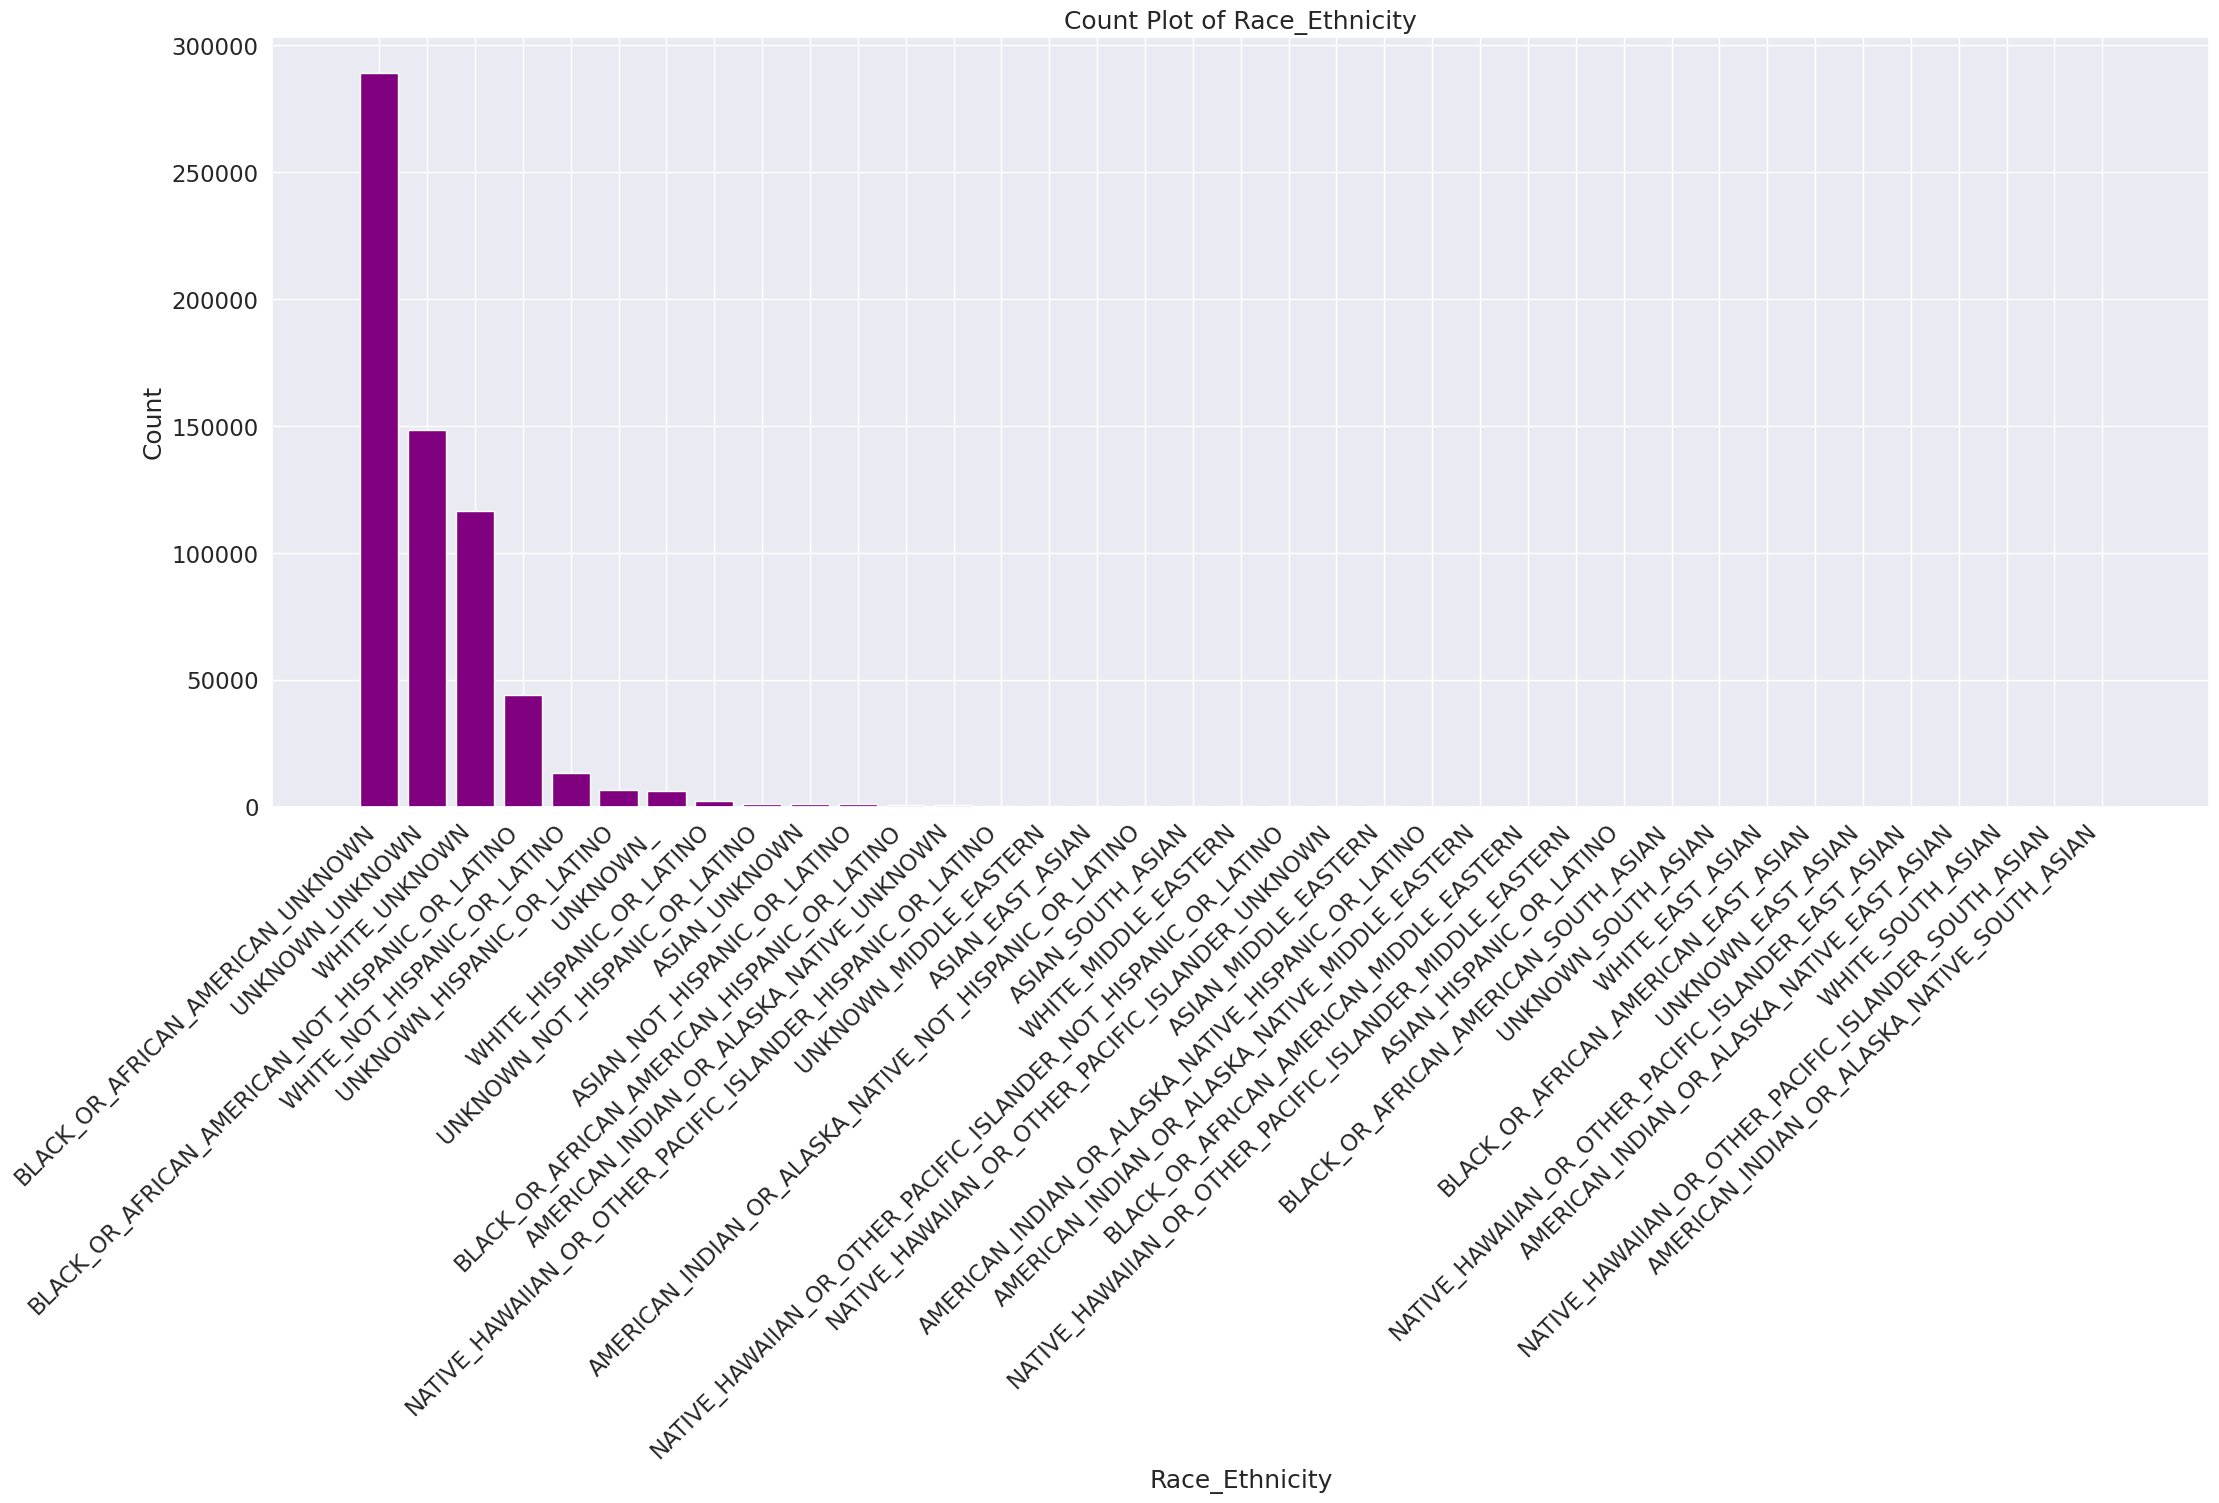

In [23]:
sns.set(font_scale=1.5)
plt.figure(figsize=(25, 10))
# Counting the occurrences of each unique value in the 'Race_Ethnicity' column
race_ethnicity_counts = crime_data['Race_Ethnicity'].value_counts()

plt.bar(race_ethnicity_counts.index, race_ethnicity_counts, color='purple')
plt.title('Count Plot of Race_Ethnicity')
plt.xlabel('Race_Ethnicity')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Count')

plt.show()

The graph shows the distribution of different racial groups (Race) across various crime descriptions in the dataset. Each bar represents a specific crime type, with the segments within the bars indicating the count of each racial group associated with that crime. The visualization helps identify which racial groups are more frequently associated with certain types of crime.

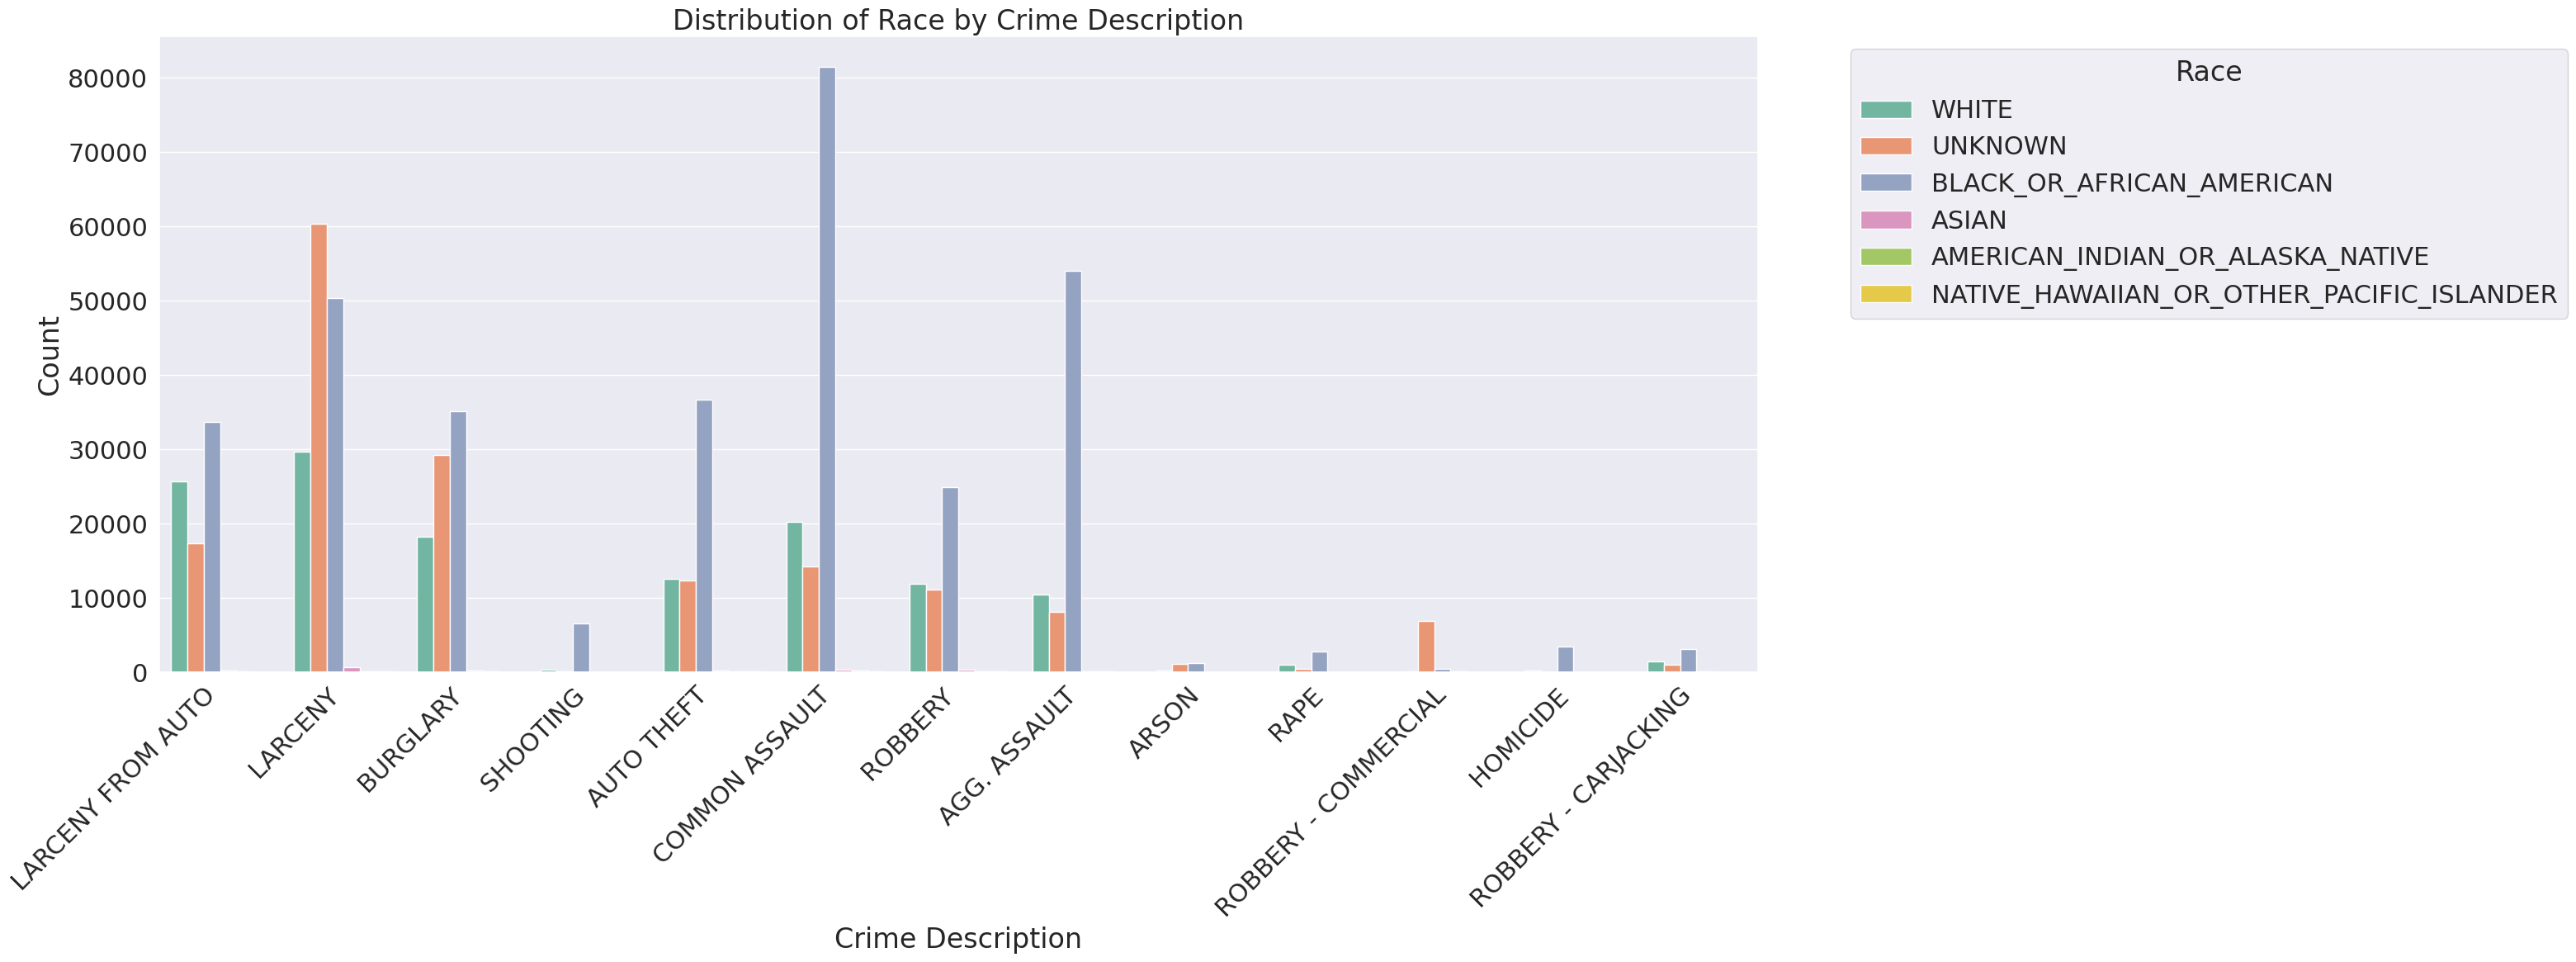

In [24]:
sns.set(font_scale=2)
plt.figure(figsize=(25, 10))
sns.countplot(x='Description', hue='Race', data=crime_data, palette='Set2')

plt.xticks(rotation=90)
plt.title('Distribution of Race by Crime Description')
plt.xlabel('Crime Description')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

###Hypothesis Test 1: Chi-Squared Test
**Null Hypothesis:** The district where a crime was committed will have an impact of the likelihood of the nature (description) of the crime.<br />
**Alternate Hypothesis:** The district where a crime was committed will not have an impact of the likelihood of the nature (description) of the crime.<br />
For this test we used a Chi-Squared test, since both variables are categorical.

In [25]:
#Columns: district, description
contingency = pd.crosstab(df.District, df.Description)
contingency

Description,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,SHOOTING
District,,,,,,,,,,,,,
CENTRAL,7742,176,4780,6657,14668,244,21443,11620,539,6924,502,999,613
EASTERN,8143,261,4501,6421,12709,534,10550,5933,433,3868,398,555,1050
NORTHEAST,10282,462,11975,14763,16419,477,18454,10960,614,7743,949,1216,783
NORTHERN,5792,222,6268,9871,10094,238,17632,9461,426,4870,540,992,443
NORTHWEST,7518,345,7595,9545,10657,487,13263,6404,458,4695,835,860,731
OUT OF JURISDICTION,1,0,0,0,0,0,0,0,0,0,0,0,0
SOUTHEAST,8231,226,6844,11040,14550,296,21708,15258,501,7872,608,1213,585
SOUTHERN,8119,330,7462,9244,12827,372,16839,8572,486,4951,677,639,751
SOUTHWEST,8598,360,7086,9165,13153,525,12035,5334,439,3896,637,622,955


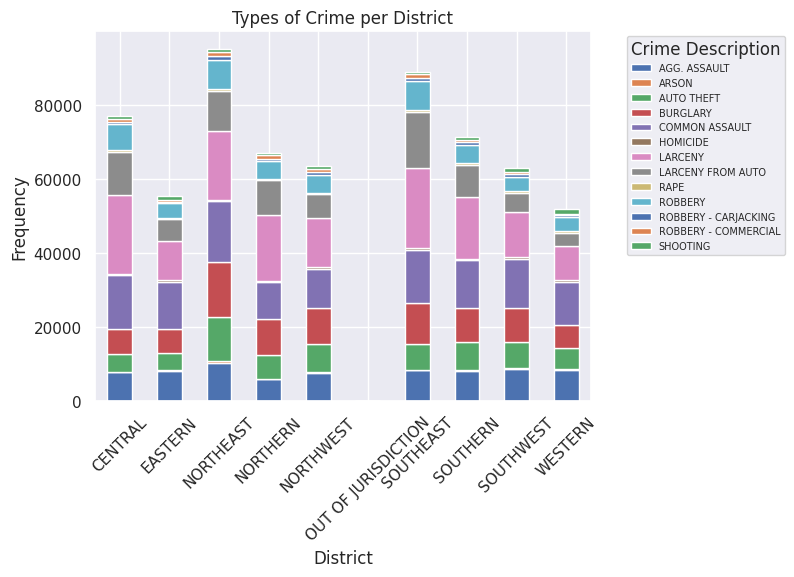

In [26]:
sns.set(font_scale=1)
plt = contingency.plot.bar(rot=45, title="Types of Crime per District", xlabel="District", ylabel="Frequency", stacked=True)
plt.legend(title="Crime Description", prop={'size': 7}, bbox_to_anchor=(1.4, 1.0), loc='upper right')

In [27]:
import scipy.stats as stats
chi2_res = stats.chi2_contingency(contingency)
if chi2_res.pvalue < 0.05:
  print("Reject, p-value is", str(chi2_res.pvalue))
else:
  print("Fail to Reject, p-value is", str(chi2_res.pvalue))

Reject, p-value is 0.0


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. District does not have a significant impact on the likelihood of the nature (description) of the crime.<br /><br />
###Hypothesis Test 2: ANOVA
**Null Hypothesis:** The description of the crime and the weapon used do not significantly impact one another.<br />
**Alternate Hypothesis:** The description of the crime and the weapon used do significantly impact one another.

In [28]:
import matplotlib.pyplot as plt

In [29]:
# Group by 'Description' and 'Weapon'
grouped_description_weapon = df.groupby(['Description', 'Weapon']).size().reset_index(name='Count')
print(grouped_description_weapon)

      Description             Weapon  Count
0    AGG. ASSAULT       ASPHYXIATION    415
1    AGG. ASSAULT  AUTOMATIC_FIREARM     38
2    AGG. ASSAULT  AUTOMATIC_HANDGUN     59
3    AGG. ASSAULT    AUTOMATIC_RIFLE     13
4    AGG. ASSAULT  AUTOMATIC_SHOTGUN      3
..            ...                ...    ...
167      SHOOTING               NONE      5
168      SHOOTING              OTHER      1
169      SHOOTING    PERSONAL_WEAPON      5
170      SHOOTING              RIFLE      7
171      SHOOTING            UNKNOWN      4

[172 rows x 3 columns]


To make both the largest and smallest value counts in this graph visible, the y axis was scaled logarithmically.

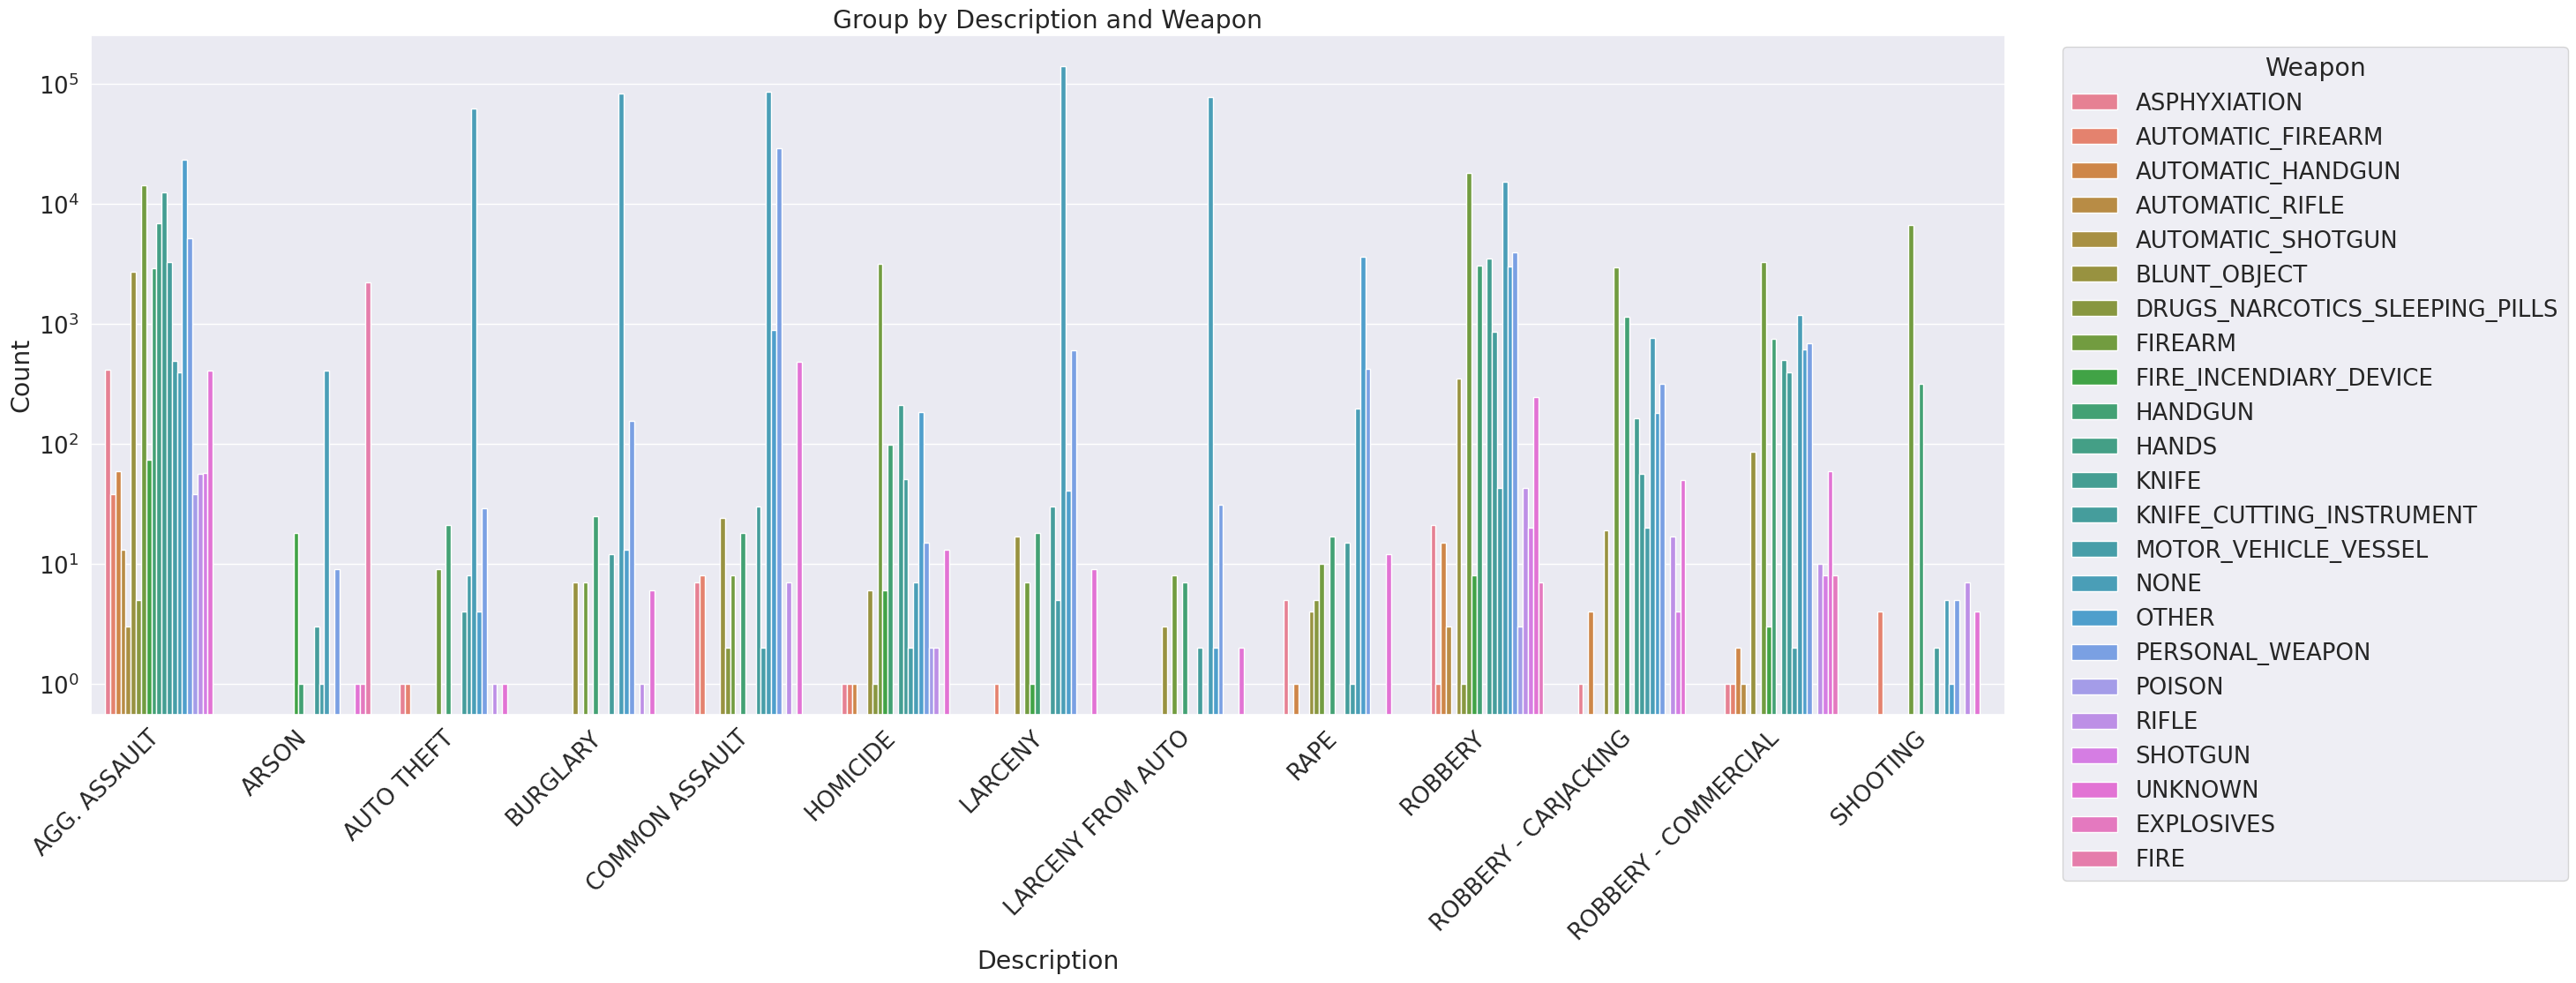

In [30]:
sns.set(font_scale=1.7)
plt.figure(figsize=(28, 10))
anovaplot = sns.barplot(x='Description', y='Count', hue='Weapon', data=grouped_description_weapon)

plt.title('Group by Description and Weapon')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yscale('log')
#plt.margins(y=0.01)
plt.legend(title="Weapon", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [31]:
anova_data = [group['Count'].values for name, group in grouped_description_weapon.groupby('Description')]

#ANOVA
f_statistic, p_value = stats.f_oneway(*anova_data)

print("P-value:", p_value)

P-value: 0.5555154068858684


In [32]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Fail to reject


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. Therefore, The description of the crime and the weapon used do significantly impact one another.

###Hypothesis Test 2a:

###Hypothesis Test 3: T-Test
**Null Hypothesis:**  There is no difference in the average age of male and female perpetrators. <br>
**Alternate Hypothesis:** There is a difference in the average age of male and female perpetrators. <br>
A T-Test was used to determine whether gender has a significant impact on the likelihood of being a criminal perpetrator.

In [33]:
male_ages = df[(df['Gender'] == 'M')  & (df['Age'].notna())]['Age']
female_ages = df[(df['Gender'] == 'F')  & (df['Age'].notna())]['Age']
print(male_ages)
print(female_ages)

# t-test
t_statistic, p_value = stats.ttest_ind(male_ages, female_ages, equal_var=False)  # Use equal_var=False for Welch's t-test

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

113599    69
124187    24
127586    67
128389    38
152349    19
          ..
641632    29
641633    21
641637    38
641642    44
641646    32
Name: Age, Length: 251700, dtype: int64
152351    22
152353    30
152418    43
152420    36
152422    44
          ..
641636    52
641639    30
641640    26
641643    74
641645    40
Name: Age, Length: 267242, dtype: int64
T-statistic: 53.2385541965907
P-value: 0.0


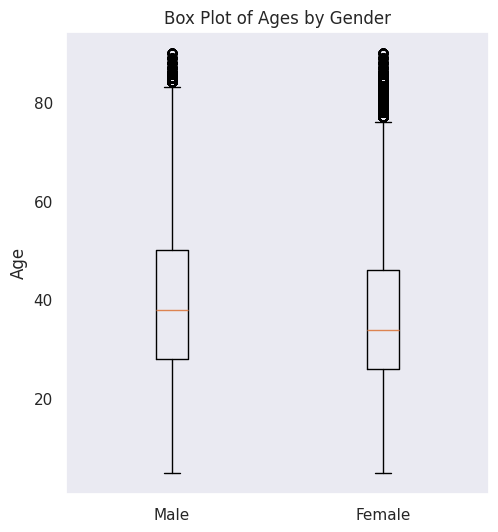

In [34]:
sns.set(font_scale=1)
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
plt.boxplot([male_ages, female_ages], labels=['Male', 'Female'])
plt.title('Box Plot of Ages by Gender')
plt.ylabel('Age')
plt.grid()

plt.show()

In [35]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Reject


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. The t-test shows that there is a significant difference in the average ages of male and female perpetrators in this data.

Comparing property crime rate to the rate of other crimes over time

# Primary Analysis
* We used a <strong>Classification</strong> machine learning technique to predict the type of crime based on various features in the dataset, such as location, weapon used, age of the individuals involved, and time of day. We will train a classification model, such as a decision tree or random forest, to learn the relationships between these features and the corresponding crime types. The model will then classify new instances of crime based on the patterns it has learned. This will help us understand which features are most important in predicting crime types and how well we can categorize crimes based on these factors.<br><br>
* We used a <strong>Regression</strong> machine learning technique to predict future crime trends or rates based on historical data. By training a regression model, such as linear regression or random forest regression, we will estimate how various features like neighborhood, time of day, race/ethnicity, and type of crime influence the number of crimes in the future. The model will provide insights into which factors contribute most to crime rates and help forecast crime trends in specific areas. This will aid in identifying patterns and predicting potential increases or decreases in crime over time.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [37]:
# Check for missing values
print("Missing values per column:")
print(crime_data.isnull().sum())

Missing values per column:
RowID                  0
CCNumber               0
Description            0
Inside_Outside    591344
Weapon                 0
Post                  64
Gender            101347
Age                    0
Race                   0
Ethnicity              0
Location            1680
District               0
Neighborhood           0
GeoLocation            0
PremiseType        50981
Date                   0
Time                   0
Race_Ethnicity         0
dtype: int64


In [38]:
# Feature selection
print(df.columns)
features = ['Weapon', 'Post', 'Gender', 'Age', 'Race', 'Ethnicity', 'Location', 'District', 'Neighborhood', 'PremiseType', 'Date', 'Time']
X = df[features]
y = df['Description']

Index(['RowID', 'CCNumber', 'Description', 'Inside_Outside', 'Weapon', 'Post',
       'Gender', 'Age', 'Race', 'Ethnicity', 'Location', 'District',
       'Neighborhood', 'GeoLocation', 'PremiseType', 'Date', 'Time',
       'Race_Ethnicity'],
      dtype='object')


In [39]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

###Data Pre-processing for ML
https://www.geeksforgeeks.org/how-to-fit-categorical-data-types-for-random-forest-classification/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder <br>
To train the RandomForest Classifier on the categorical data, each categorical feature needed to be encoded as ordinal numeric data.

In [40]:
categorical = ['Weapon', 'Gender', 'Race', 'Ethnicity', 'Location', 'District', 'Neighborhood', 'PremiseType']


In [41]:
# Create instance of Random Forest Classifier and train it on the train dataset
# rf = RandomForestClassifier()
# rf.fit(X_train_scaled, y_train)

#Data Processing for Regression ML

        Neighborhood  Year  Month  Crime_Count
0              ABELL  2011      1           10
1              ABELL  2011      2            5
2              ABELL  2011      3            6
3              ABELL  2011      4            5
4              ABELL  2011      5            5
...              ...   ...    ...          ...
43589  YORK-HOMELAND  2024      7            2
43590  YORK-HOMELAND  2024      8            2
43591  YORK-HOMELAND  2024      9            2
43592  YORK-HOMELAND  2024     10            4
43593  YORK-HOMELAND  2024     11            4

[43594 rows x 4 columns]
Filtered Data (from 2024 to predict 2025 onwards):
        Neighborhood  Year  Month  Crime_Count
155            ABELL  2024      1           12
156            ABELL  2024      2           15
157            ABELL  2024      3           11
158            ABELL  2024      4            7
159            ABELL  2024      5            6
...              ...   ...    ...          ...
43589  YORK-HOMELAND  2024    

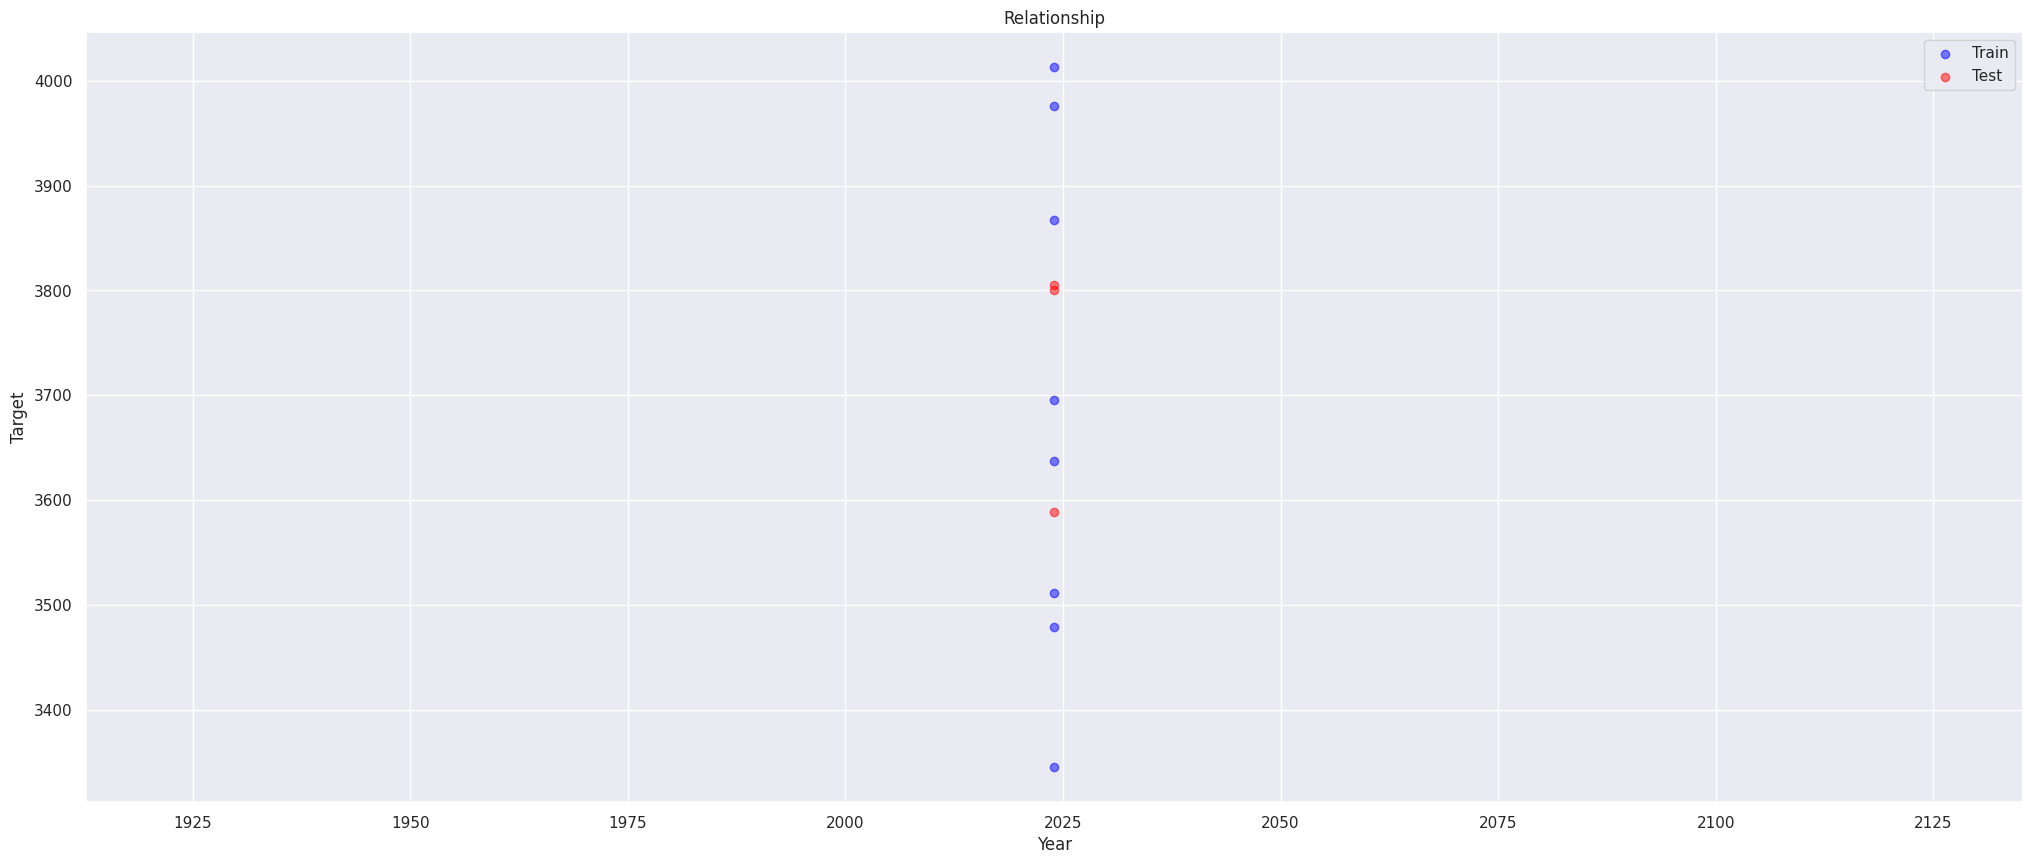

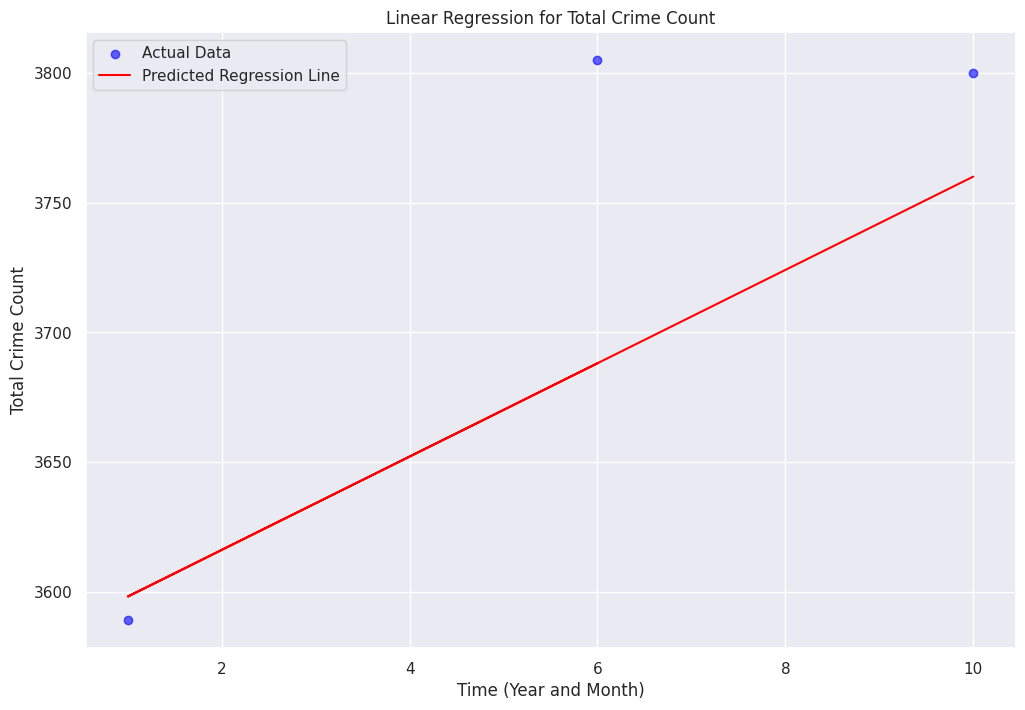

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Preprocess the data
# Aggregating data to create a target variable (e.g., crime count per neighborhood)
crime_data['Date'] = pd.to_datetime(crime_data['Date'])  # Ensure the date is in datetime format
crime_data['Year'] = crime_data['Date'].dt.year  # Extract year
crime_data['Month'] = crime_data['Date'].dt.month  # Extract month

# Group by neighborhood and year-month to count incidents
grouped_data = crime_data.groupby(['Neighborhood', 'Year', 'Month']).size().reset_index(name='Crime_Count')
print(grouped_data)

# Step 2: Filter data to include only years from 2024
filtered_data = grouped_data[grouped_data['Year'] == 2024]
print("Filtered Data (from 2024 to predict 2025 onwards):")
print(filtered_data)

# Step 1: Aggregate crime count across all neighborhoods by Year and Month
total_crime_data = filtered_data.groupby(['Year', 'Month'])['Crime_Count'].sum().reset_index()
print("Aggregated Total Crime Data:")
print(total_crime_data)

# Step 2: Prepare features and target for regression
X = total_crime_data[['Year', 'Month']]  # Features
Y = total_crime_data['Crime_Count']     # Target: total crime count

# Set random state and split the filtered data
random_state = 42
np.random.seed(random_state)
test_size = 0.2

def split_data(X, Y, test_size=test_size, random_state=random_state):
    return train_test_split(X, Y, test_size=test_size, random_state=random_state)

# Step 3: Train-test split
X_train, X_test, Y_train, Y_test = split_data(X, Y)

# Scatter plot function with adjustable figure size
def draw_scatter(X_train, Y_train, X_test, Y_test, title, xlabel='Feature', ylabel='Target'):
    plt.figure(figsize=(25, 10))  # Adjusted figure size
    plt.scatter(X_train['Year'], Y_train, color='blue', label='Train', alpha=0.5)
    plt.scatter(X_test['Year'], Y_test, color='red', label='Test', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot the dataset with 'Year' as the feature
draw_scatter(X_train, Y_train, X_test, Y_test, 'Relationship', xlabel='Year')

# Step 4: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Step 5: Make predictions
Y_pred = model.predict(X_test)

# Step 6: Plot the data and regression line
def plot_regression_line(X, Y, Y_pred, title, xlabel='Time (Year and Month)', ylabel='Total Crime Count', figsize=(12, 8)):
    plt.figure(figsize=figsize)

    # Scatter plot of actual data
    plt.scatter(X['Month'] + (X['Year'] - 2024) * 12, Y, color='blue', label='Actual Data', alpha=0.6)

    # Regression line
    plt.plot(X_test['Month'] + (X_test['Year'] - 2024) * 12, Y_pred, color='red', label='Predicted Regression Line')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Step 7: Plot the regression line with actual points
plot_regression_line(X_test, Y_test, Y_pred, 'Linear Regression for Total Crime Count')

# # Step 1: Preprocess the data
# # Aggregating data to create a target variable (e.g., crime count per neighborhood)
# crime_data['Date'] = pd.to_datetime(crime_data['Date'])  # Ensure the date is in datetime format
# crime_data['Year'] = crime_data['Date'].dt.year  # Extract year
# crime_data['Month'] = crime_data['Date'].dt.month  # Extract month

# # Group by neighborhood and year-month to count incidents
# grouped_data = crime_data.groupby(['Neighborhood', 'Year', 'Month']).size().reset_index(name='Crime_Count')
# print(grouped_data)

# # Step 2: Filter data to include only years from 2024
# filtered_data = grouped_data[grouped_data['Year'] == 2024]
# print("Filtered Data (from 2024 to predict 2025 onwards):")
# print(filtered_data)

# # Update features and target based on filtered data
# X = filtered_data[['Year', 'Month']]  # Features
# Y = filtered_data['Crime_Count']     # Target: crime count

# # Set random state and split the filtered data
# random_state = 42
# np.random.seed(random_state)
# test_size = 0.2

# def split_data(X, Y, test_size=test_size, random_state=random_state):
#     return train_test_split(X, Y, test_size=test_size, random_state=random_state)

# X_train, X_test, Y_train, Y_test = split_data(X, Y)

# # Scatter plot function with adjustable figure size
# def draw_scatter(X_train, Y_train, X_test, Y_test, title, xlabel='Feature', ylabel='Target'):
#     plt.figure(figsize=(25, 10))  # Adjusted figure size
#     plt.scatter(X_train['Year'], Y_train, color='blue', label='Train', alpha=0.5)
#     plt.scatter(X_test['Year'], Y_test, color='red', label='Test', alpha=0.5)
#     plt.title(title)
#     plt.xlabel(xlabel)
#     if ylabel:
#         plt.ylabel(ylabel)
#     plt.legend()
#     plt.show()

# # Plot the dataset with 'Year' as the feature
# draw_scatter(X_train, Y_train, X_test, Y_test, 'Relationship', xlabel='Year')

# Encode Neighborhood as a numeric variable if needed
# Optional: pd.get_dummies(grouped_data, columns=['Neighborhood'], drop_first=True)


# # Step 2: Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Train the linear regression model
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# # Step 4: Make predictions
# y_pred = lr_model.predict(X_test)

# # Step 5: Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R²): {r2}")

# # Step 6: Visualize predictions vs actual
# plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
# plt.xlabel('Actual Crime Counts')
# plt.ylabel('Predicted Crime Counts')
# plt.title('Linear Regression: Actual vs Predicted Crime Counts')
# plt.show()

#Insights and Conclusions